In [ ]:
# !python -m venv venv
# # !venv/scripts/activate
# !pip install pandas numpy matplotlib seaborn plotly geopandas scipy scikit-learn statsmodels requests

In [29]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# Scientific Computing
import scipy

# Machine Learning
import sklearn

# Statistical Models
import statsmodels.api as sm

import requests
import os

pd.set_option('display.max_columns', None)

In [2]:
'''df = pd.read_json(os.path.join('aircraft_data_2024-02-01','aircraft_data_2024-02-01.json')
df = pd.json_normalize(df['aircraft'])
df'''

"df = pd.read_json(os.path.join('aircraft_data_2024-02-01','aircraft_data_2024-02-01.json')\ndf = pd.json_normalize(df['aircraft'])\ndf"

           hex        type    flight       r     t alt_baro  alt_geom     gs  \
0       3a5400   adsb_icao  THT101A   F-OVAA  B789    40000   41375.0  433.8   
3       780a28   adsb_icao  CPA2087    B-LJF  B748    36000   33650.0  446.9   
7       71c084   adsb_icao  KAL074    HL8084  B789    35975   33675.0  440.9   
8       8691cc   adsb_icao  ANA11     JA785A  B77W    34000   31675.0  441.6   
9       86d9d2   adsb_icao  ANA101    JA836A  B789    37975   35775.0  446.7   
...        ...         ...       ...     ...   ...      ...       ...    ...   
11855   4ba9fa      mode_s  THY6284   TC-JOZ  A332    36000       NaN  440.0   
11861  ~32caaa  tisb_other       NaN     NaN   NaN   ground       NaN   17.0   
11862   a690ef      mode_s       NaN  N522FX  CL30   ground       NaN    0.0   
11864  ~35055b  tisb_other       NaN     NaN   NaN   ground       NaN   17.1   
11867  ~27b59a  tisb_other       NaN     NaN   NaN      600    2975.0   81.8   

        track  geom_rate squawk emergen

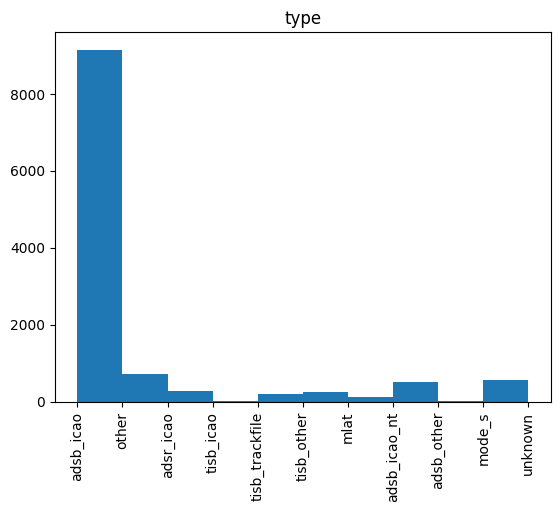

List all ADSB versions with counts version
2.0    8881
0.0    1119
1.0     141
4.0       2
7.0       2
6.0       1
Name: count, dtype: int64


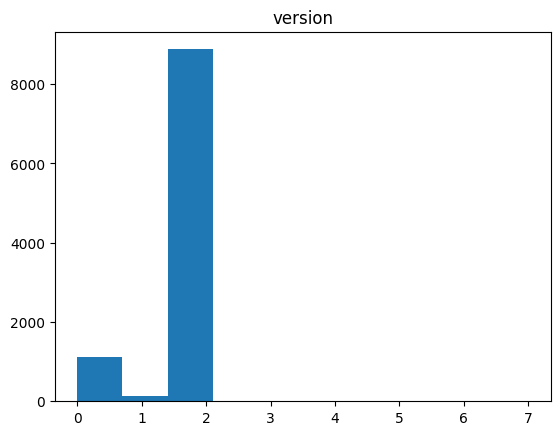

List all nac_p values with counts nac_p
10.0    4938
9.0     3297
8.0      874
11.0     454
0.0      449
7.0       75
6.0       52
5.0       10
4.0        5
1.0        5
Name: count, dtype: int64


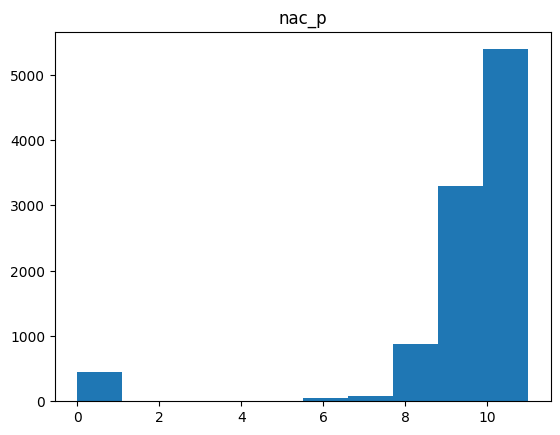

List all nac_v values with counts nac_v
2.0    4896
1.0    3896
0.0     664
4.0     290
3.0      14
7.0      10
Name: count, dtype: int64


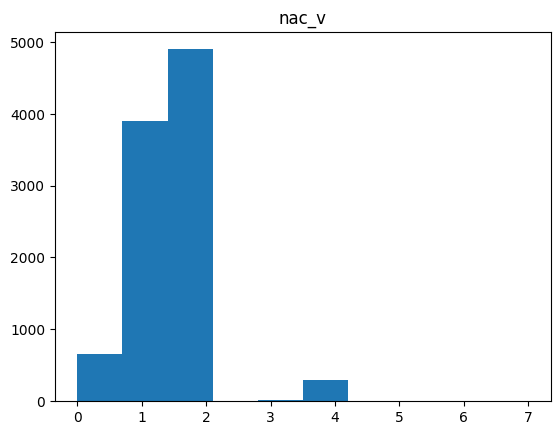

List all roll with counts roll
 0.00    385
-0.18    308
 0.18    297
-0.35    189
 0.35    166
        ... 
-3.34      1
-6.33      1
-6.86      1
 9.84      1
 2.11      1
Name: count, Length: 143, dtype: int64


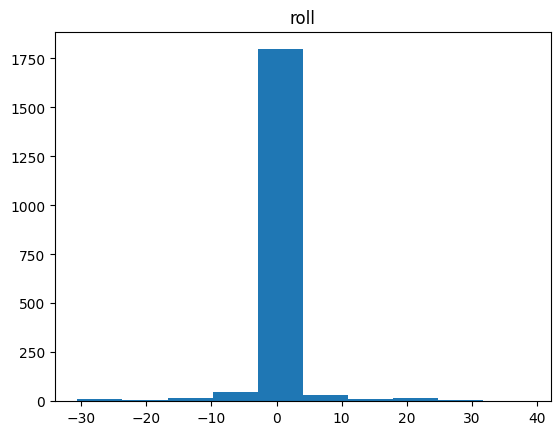

In [30]:
# for each timeslice of 5 minutes, find the aircraft-ping with nac_p, nac_v above a certain threshold, 
# and gpsOkBefore, rr_lat, rr_lon if these values are not empty
# (each timeslice is 800kb)
#
# after filtering the timeslice, the filtered data should be much smaller say 10 kb
#
# define array of locations (squares) according to lat and lon limits
# 
# loop through all timeslice-aircraft-ping and find location and append
# 
# loop through all locations and run the data through the classification function to determine the color

url = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000000Z.json.gz'
response = requests.get(url)
json_data = response.json()
df1 = pd.json_normalize(json_data['aircraft'])
df1_filtered = df1[df1[['nac_p','nac_v']].notnull().all(1)]
print(df1_filtered)
nacp_high = df1_filtered[df1_filtered['nac_p']<8]
data = df1_filtered['nac_p']

# rr_lat not null
# rr_lon not null
# lastPosition.lat / lastPosition.lon not null
print(f"List all type with counts {df1['type'].value_counts()}")
# List all type with counts type
# adsb_icao         9145 - messages from a Mode S or ADS-B transponder, using a 24-bit ICAO address
# other              725 - IGNORE miscellaneous data received via Basestation / SBS format, quality / source is unknown.
# adsb_icao_nt       524 - IGNORE - messages from an ADS-B equipped “non-transponder” emitter e.g. a ground vehicle, using a 24-bit ICAO address
# mode_s             515 - ModeS data from the planes transponder (no position transmitted)
# adsr_icao          280 - rebroadcast of ADS-B messages originally sent via another data link e.g. UAT, using a 24-bit ICAO address
# tisb_other         256 - traffic information about a non-ADS-B target using a non-ICAO address
# tisb_trackfile     214 - traffic information about a non-ADS-B target using a track/file identifier, typically from primary or Mode A/C radar
# mlat               116 - MLAT, position calculated arrival time differences using multiple receivers, outliers and varying accuracy is expected.
# unknown             49
# tisb_icao           31 - traffic information about a non-ADS-B target identified by a 24-bit ICAO address, e.g. a Mode S target tracked by secondary radar
# adsb_other          17 - messages from an ADS-B transponder using a non-ICAO address, e.g. anonymized address
plt.hist(df1['type'])
plt.title('type')
plt.xticks(rotation='vertical')
plt.show()

print(f"List all ADSB versions with counts {df1['version'].value_counts()}")
# version: ADS-B Version Number 0, 1, 2 (3-7 are reserved) (2.2.3.2.7.5)
# List all ADSB versions with counts version
# 2.0    8881
# 0.0    1119
# 1.0     141
plt.hist(df1['version'])
plt.title('version')
plt.show()

# nac_p: Navigation Accuracy for Position (2.2.5.1.35)
counts = df1['nac_p'].value_counts()
print(f"List all nac_p values with counts {counts}")
plt.hist(df1['nac_p'])
plt.title('nac_p')
plt.show()

# nac_v: Navigation Accuracy for Velocity (2.2.5.1.19)
counts = df1['nac_v'].value_counts()
print(f"List all nac_v values with counts {counts}")
plt.hist(df1['nac_v'])
plt.title('nac_v')
plt.show()

# roll: Roll, degrees, negative is left roll
counts = df1['roll'].value_counts()
print(f"List all roll with counts {counts}")
plt.hist(df1['roll'])
plt.title('roll')
plt.show()

List all category with counts           hex          type    flight        r     t alt_baro  alt_geom  \
0      3a5400     adsb_icao  THT101A    F-OVAA  B789    40000   41375.0   
1      a4b0bb         other  DAL281     N401DZ  A339    36000       NaN   
2      ae0240         other       NaN  59-1513  K35R    32000       NaN   
3      780a28     adsb_icao  CPA2087     B-LJF  B748    36000   33650.0   
4      71c210         other  KAL032     HL8210  B77W    34000       NaN   
...       ...           ...       ...      ...   ...      ...       ...   
11853  738302  adsb_icao_nt                NaN   NaN      NaN       NaN   
11854  7c4ef0        mode_s  PVM        VH-PVM  TBM7   ground       NaN   
11855  4ba9fa        mode_s  THY6284    TC-JOZ  A332    36000       NaN   
11858  a69aa6     adsr_icao  N52432     N52432  C172      NaN       NaN   
11870  a2c71f     adsr_icao       NaN   N2784G  C182      NaN       NaN   

          gs   track  geom_rate squawk emergency category  nav_qnh  \

TypeError: 'value' must be an instance of str or bytes, not a float

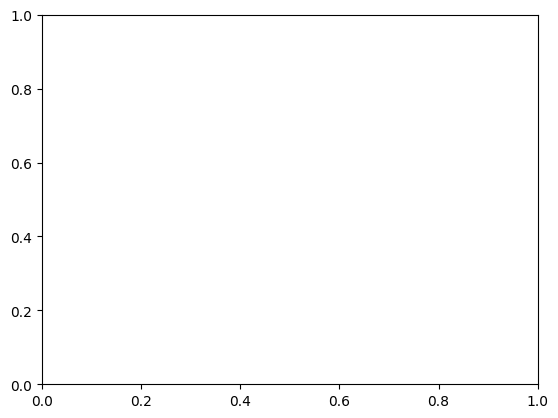

In [38]:
# category: emitter category to identify particular aircraft or vehicle classes (values A0 – D7) (2.2.3.2.5.2)
counts = df1[df1['category'].notnull().value_counts()]
print(f"List all category with counts {counts}")
plt.hist(df1['category'])
plt.title('category')
plt.show()
# A0 : No ADS-B emitter category information. Do not use this emitter category. If no emitter category fits your installation, seek guidance from the FAA as appropriate.

# A1 : Light (< 15500 lbs) – Any airplane with a maximum takeoff weight less than 15,500 pounds. This includes very light aircraft (light sport aircraft) that do not meet the requirements of 14 CFR § 103.1.

# A2 : Small (15500 to 75000 lbs) – Any airplane with a maximum takeoff weight greater than or equal to15,500 pounds but less than 75,000 pounds.

# A3 : Large (75000 to 300000 lbs) – Any airplane with a maximum takeoff weight greater than or equal to 75,000 pounds but less than 300,000 pounds that does not qualify for the high vortex category.

# A4 :  High vortex large (aircraft such as B-757) – Any airplane with a maximum takeoff weight greater than or equal to 75,000 pounds but less than 300,000 pounds that has been determined to generate a high wake vortex. Currently, the Boeing 757 is the only example.

# A5 : Heavy (> 300000 lbs) – Any airplane with a maximum takeoff weight equal to or above 300,000 pounds.

# A6 : High performance (> 5g acceleration and 400 kts) – Any airplane, regardless of weight, which can maneuver in excess of 5 G’s and maintain true airspeed above 400 knots.

# A7 : Rotorcraft – Any rotorcraft regardless of weight.

# B0 : No ADS-B emitter category information

# B1 : Glider / sailplane – Any glider or sailplane regardless of weight.

# B2 : Lighter-than-air – Any lighter than air (airship or balloon) regardless of weight.

# B3 : Parachutist / skydiver

# B4 : Ultralight / hang-glider / paraglider – A vehicle that meets the requirements of 14 CFR § 103.1. Light sport aircraft should not use the ultralight emitter category unless they meet 14 CFR § 103.1.

# B5 : Reserved

# B6 : Unmanned aerial vehicle – Any unmanned aerial vehicle or unmanned aircraft system regardless of weight.

# B7 : Space / trans-atmospheric vehicle

# C0 : No ADS-B emitter category information

# C1 : Surface vehicle – emergency vehicle

# C2 : Surface vehicle – service vehicle

# C3 : Point obstacle (includes tethered balloons)

# C4 : Cluster obstacle

# C5 : Line obstacle

# C6 : Reserved

# C7 : Reserved

In [ ]:
url2 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000005Z.json.gz'
response2 = requests.get(url2)
json_data2 = response2.json()
df2 = pd.json_normalize(json_data2['aircraft'])
url3 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000010Z.json.gz'
response3 = requests.get(url3)
json_data3 = response2.json()
df3 = pd.json_normalize(json_data3['aircraft'])
url4 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000015Z.json.gz'
response4 = requests.get(url4)
json_data4 = response2.json()
df4 = pd.json_normalize(json_data4['aircraft'])